In [15]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Hackathon_KH/test_loan_data (1).csv")
df.tail()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
19995,MO,38500.0,Sep-2010,4 years,lighting coordinator,679.0,675.0,D,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36 months,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,Dec-1998,3 years,Contract & Compliance Manager,674.0,670.0,D,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60 months,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,May-1996,10+ years,Pharmacist,729.0,725.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36 months,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,Mar-2003,10+ years,Manager In Training,809.0,805.0,A,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36 months,Car financing,19.0,Not Verified
19999,FL,30700.0,Apr-1994,< 1 year,rv technician,664.0,660.0,E,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,8910.0,78.8,E1,60 months,Debt consolidation,19.0,Verified


In [16]:
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              1258
emp_title               1378
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      11
purpose                    0
revol_bal                  0
revol_util                13
sub_grade                  0
term                       0
title                    247
total_acc                  0
verification_status        0
dtype: int64

In [17]:
from datetime import datetime

# Iterate over each value in the earliest_cr_line column
for i in range(len(df['earliest_cr_line'])):
    # Parse the date string into the desired format
    parsed_date = datetime.strptime(df['earliest_cr_line'][i], "%b-%Y")
    # Replace the value in the earliest_cr_line column with the parsed date
    df.at[i, 'earliest_cr_line'] = parsed_date

In [18]:
import preprocessing_functions

In [19]:
from preprocessing_functions import handle_missing_values, convert_date_column, encode_categorical_feature, map_values, drop_null_rows, impute_missing_values, winsorize_column

In [20]:
import joblib

# Load the preprocessing pipeline from the pickle file
preprocessing_pipeline = joblib.load('/content/preprocessing_pipeline_new.pkl')

# Apply the preprocessing pipeline to the new dataset
new_preprocessed_data = preprocessing_pipeline.transform(df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/content/preprocessing_functions.py:17: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [21]:
new_preprocessed_data

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,2012-05-01 00:00:00,1.0,Tower technician,719.0,715.0,2.0,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36,Debt consolidation,11.0,Source Verified
1,HI,92000.0,2001-12-01 00:00:00,10.0,Supervisor,684.0,680.0,1.0,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36,Debt consolidation,35.0,Source Verified
2,TX,89000.0,1989-03-01 00:00:00,10.0,APPLICATIONS PROGRAMMER,679.0,675.0,1.0,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,2004-11-01 00:00:00,9.0,San Diego Unified School District,674.0,670.0,2.0,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36,Breathing Room,16.0,Not Verified
4,MI,35580.0,1997-02-01 00:00:00,7.6,NaN,704.0,700.0,1.0,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36,debitconsolidation,19.0,Verified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MO,38500.0,2010-09-01 00:00:00,4.0,lighting coordinator,679.0,675.0,3.0,RENT,Individual,...,0.0,0.0,debt_consolidation,5816.0,60.0,D4,36,Debt consolidation,10.0,Not Verified
19996,VA,80000.0,1998-12-01 00:00:00,3.0,Contract & Compliance Manager,674.0,670.0,3.0,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,13886.0,75.1,D4,60,Debt consolidation,30.0,Source Verified
19997,TX,95000.0,1996-05-01 00:00:00,10.0,Pharmacist,729.0,725.0,1.0,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,43166.0,60.7,B5,36,Debt consolidation,29.0,Source Verified
19998,FL,35000.0,2003-03-01 00:00:00,10.0,Manager In Training,809.0,805.0,0.0,MORTGAGE,Individual,...,0.0,0.0,car,1110.0,4.4,A5,36,Car financing,19.0,Not Verified


In [22]:
new_preprocessed_data.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length                 0
emp_title               1343
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl             0
mort_acc                   0
tot_cur_bal                0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies       0
purpose                    0
revol_bal                  0
revol_util                 0
sub_grade                  0
term                       0
title                      0
total_acc                  0
verification_status        0
dtype: int64

In [23]:
import numpy as np
numerical_df = new_preprocessed_data.select_dtypes(include=[np.number]).copy()

In [24]:
# Load the GBM model and scaler
gbm_model = joblib.load('best_gbm_model.pkl')
scaler = joblib.load('scaler.pkl')

In [25]:
numerical_df

,annual_inc,emp_length,fico_range_high,fico_range_low,grade,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc
0,50000.0,1.0,719.0,715.0,2.0,13.99,5000.0,1.0,0.0,33395.0,9.0,0.0,0.0,2568.0,9.8,36,11.0
1,92000.0,10.0,684.0,680.0,1.0,10.99,30000.0,2.0,2.0,229832.0,11.0,0.0,0.0,30394.0,75.4,36,35.0
2,89000.0,10.0,679.0,675.0,1.0,10.15,16000.0,5.0,2.0,181616.0,15.0,0.0,0.0,38400.0,75.3,60,41.0
3,33000.0,9.0,674.0,670.0,2.0,13.68,10000.0,6.0,0.0,30603.0,12.0,1.0,1.0,21224.0,69.4,36,16.0
4,35580.0,7.6,704.0,700.0,1.0,14.09,4000.0,2.0,4.0,124597.0,8.0,0.0,0.0,3471.0,39.4,36,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,38500.0,4.0,679.0,675.0,3.0,17.57,10000.0,1.0,0.0,30397.0,10.0,0.0,0.0,5816.0,60.0,36,10.0
19996,80000.0,3.0,674.0,670.0,3.0,18.92,18375.0,2.0,5.0,494439.0,9.0,0.0,0.0,13886.0,75.1,60,30.0
19997,95000.0,10.0,729.0,725.0,1.0,11.22,35000.0,2.0,4.0,284915.0,10.0,0.0,0.0,43166.0,60.7,36,29.0
19998,35000.0,10.0,809.0,805.0,0.0,7.89,5000.0,1.0,0.0,8205.0,9.0,0.0,0.0,1110.0,4.4,36,19.0


In [26]:
# Scale the new data using the saved scaler
scaled_data = scaler.transform(numerical_df)

# Make predictions on the scaled data using the GBM model
predictions = gbm_model.predict(scaled_data)

In [27]:
predictions

array([1, 1, 1, ..., 1, 1, 0])

In [28]:
# Append the predictions array as a new column to the DataFrame
df['loan_status'] = predictions

# Save the modified DataFrame as a new CSV file
df.to_csv('/content/drive/MyDrive/Hackathon_KH/modified_dataset.csv', index=False)

In [29]:
df = pd.read_csv("/content/drive/MyDrive/Hackathon_KH/modified_dataset.csv")
df

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,MO,50000.0,2012-05-01 00:00:00,1.0,Tower technician,719.0,715.0,2.0,OWN,Individual,...,0.0,debt_consolidation,2568.0,9.8,C4,36,Debt consolidation,11.0,Source Verified,1
1,HI,92000.0,2001-12-01 00:00:00,10.0,Supervisor,684.0,680.0,1.0,RENT,Individual,...,0.0,debt_consolidation,30394.0,75.4,B2,36,Debt consolidation,35.0,Source Verified,1
2,TX,89000.0,1989-03-01 00:00:00,10.0,APPLICATIONS PROGRAMMER,679.0,675.0,1.0,MORTGAGE,Individual,...,0.0,credit_card,38400.0,75.3,B2,60,Credit card refinancing,41.0,Not Verified,1
3,CA,33000.0,2004-11-01 00:00:00,9.0,San Diego Unified School District,674.0,670.0,2.0,RENT,Individual,...,1.0,debt_consolidation,21224.0,69.4,C1,36,Breathing Room,16.0,Not Verified,1
4,MI,35580.0,1997-02-01 00:00:00,7.6,NaN,704.0,700.0,1.0,MORTGAGE,Individual,...,0.0,debt_consolidation,3471.0,39.4,B5,36,debitconsolidation,19.0,Verified,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19724,MO,38500.0,2010-09-01 00:00:00,4.0,lighting coordinator,679.0,675.0,3.0,RENT,Individual,...,0.0,debt_consolidation,5816.0,60.0,D4,36,Debt consolidation,10.0,Not Verified,1
19725,VA,80000.0,1998-12-01 00:00:00,3.0,Contract & Compliance Manager,674.0,670.0,3.0,MORTGAGE,Individual,...,0.0,debt_consolidation,13886.0,75.1,D4,60,Debt consolidation,30.0,Source Verified,1
19726,TX,95000.0,1996-05-01 00:00:00,10.0,Pharmacist,729.0,725.0,1.0,MORTGAGE,Individual,...,0.0,debt_consolidation,43166.0,60.7,B5,36,Debt consolidation,29.0,Source Verified,1
19727,FL,35000.0,2003-03-01 00:00:00,10.0,Manager In Training,809.0,805.0,0.0,MORTGAGE,Individual,...,0.0,car,1110.0,4.4,A5,36,Car financing,19.0,Not Verified,1


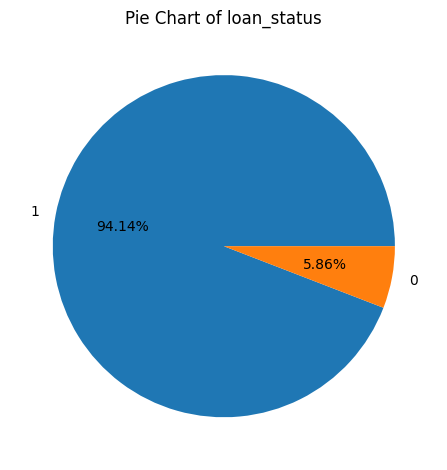

In [30]:
import matplotlib.pyplot as plt

# Select the column you want to create a pie chart for
feature_column = 'loan_status'

# Calculate the value counts and percentages
value_counts = df[feature_column].value_counts()
percentages = value_counts / len(df) * 100

# Add a title to the chart
plt.title("Pie Chart of {}".format(feature_column))

# Add the percentages as text outside each slice
_, _, autotexts = plt.pie(value_counts, labels=value_counts.index, autopct='%.2f%%')
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_verticalalignment('center')

# Display the chart
plt.tight_layout()

# 1 Means PAID
# 0 means DEFAULTED